# **AirFly Insights: Data Visualization and Analysis of Airline Operations** 

## **Milestone 1: Data Foundation and Cleaning**

#### **Week 1: Project Initialization and Dataset Setup**

• Define goals, KPIs, and workflow <br>
• Load CSVs using pandas <br>
• Explore schema, types, size, and nulls <br>
• Perform sampling and memory optimizations

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
flights_sample_file_path = r"flights_sample_3m.csv"
df = pd.read_csv(flights_sample_file_path)                             
df.head() 

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",...,0.0,186.0,176.0,153.0,1065.0,NaN,NaN,NaN,NaN,NaN
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",...,0.0,235.0,236.0,189.0,1399.0,NaN,NaN,NaN,NaN,NaN
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",...,0.0,118.0,112.0,87.0,680.0,NaN,NaN,NaN,NaN,NaN
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",...,0.0,260.0,285.0,249.0,1589.0,0.0,0.0,24.0,0.0,0.0
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",...,0.0,181.0,182.0,153.0,985.0,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(3000000, 32)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 32 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   FL_DATE                  object 
 1   AIRLINE                  object 
 2   AIRLINE_DOT              object 
 3   AIRLINE_CODE             object 
 4   DOT_CODE                 int64  
 5   FL_NUMBER                int64  
 6   ORIGIN                   object 
 7   ORIGIN_CITY              object 
 8   DEST                     object 
 9   DEST_CITY                object 
 10  CRS_DEP_TIME             int64  
 11  DEP_TIME                 float64
 12  DEP_DELAY                float64
 13  TAXI_OUT                 float64
 14  WHEELS_OFF               float64
 15  WHEELS_ON                float64
 16  TAXI_IN                  float64
 17  CRS_ARR_TIME             int64  
 18  ARR_TIME                 float64
 19  ARR_DELAY                float64
 20  CANCELLED                float64
 21  CANCELLA

In [6]:
df.nunique()

FL_DATE                    1704
AIRLINE                      18
AIRLINE_DOT                  18
AIRLINE_CODE                 18
DOT_CODE                     18
FL_NUMBER                  7111
ORIGIN                      380
ORIGIN_CITY                 373
DEST                        380
DEST_CITY                   373
CRS_DEP_TIME               1384
DEP_TIME                   1440
DEP_DELAY                  1513
TAXI_OUT                    179
WHEELS_OFF                 1440
WHEELS_ON                  1440
TAXI_IN                     202
CRS_ARR_TIME               1435
ARR_TIME                   1440
ARR_DELAY                  1527
CANCELLED                     2
CANCELLATION_CODE             4
DIVERTED                      2
CRS_ELAPSED_TIME            640
ELAPSED_TIME                696
AIR_TIME                    666
DISTANCE                   1727
DELAY_DUE_CARRIER          1291
DELAY_DUE_WEATHER           812
DELAY_DUE_NAS               671
DELAY_DUE_SECURITY          172
DELAY_DU

In [7]:
# sort the date column
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])
df = df.sort_values(by='FL_DATE').reset_index(drop=True)

In [8]:
# start and end dates of dataset
start_date = df['FL_DATE'].min()
end_date = df['FL_DATE'].max()

print("Start Date:", start_date)
print("Last Date :", end_date)

Start Date: 2019-01-01 00:00:00
Last Date : 2023-08-31 00:00:00


In [9]:
year_ranges = df.groupby(df['FL_DATE'].dt.year)['FL_DATE'].agg(['min', 'max']).reset_index()

year_ranges

,FL_DATE,min,max
0,2019,2019-01-01,2019-12-31
1,2020,2020-01-01,2020-12-31
2,2021,2021-01-01,2021-12-31
3,2022,2022-01-01,2022-12-31
4,2023,2023-01-01,2023-08-31


In [10]:
start_date = "01-01-2020"
end_date = "31-12-2021"

cropped_df = df[(df["FL_DATE"] >= start_date) & (df["FL_DATE"] <= end_date)]

In [11]:
cropped_df.shape

(1090983, 32)

In [13]:
cropped_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1090983 entries, 757673 to 1848655
Data columns (total 32 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   FL_DATE                  1090983 non-null  datetime64[ns]
 1   AIRLINE                  1090983 non-null  object        
 2   AIRLINE_DOT              1090983 non-null  object        
 3   AIRLINE_CODE             1090983 non-null  object        
 4   DOT_CODE                 1090983 non-null  int64         
 5   FL_NUMBER                1090983 non-null  int64         
 6   ORIGIN                   1090983 non-null  object        
 7   ORIGIN_CITY              1090983 non-null  object        
 8   DEST                     1090983 non-null  object        
 9   DEST_CITY                1090983 non-null  object        
 10  CRS_DEP_TIME             1090983 non-null  int64         
 11  DEP_TIME                 1052061 non-null  float64       
 12  

In [14]:
cropped_df = cropped_df.copy()

# Convert object to category
cat_cols = ["AIRLINE", "AIRLINE_DOT", "AIRLINE_CODE", 
            "ORIGIN", "ORIGIN_CITY", "DEST", "DEST_CITY", 
            "CANCELLATION_CODE"]
for col in cat_cols:
    cropped_df[col] = cropped_df[col].astype("category")

# Convert int64 -> smaller ints
cropped_df["DOT_CODE"] = cropped_df["DOT_CODE"].astype("int16")
cropped_df["FL_NUMBER"] = cropped_df["FL_NUMBER"].astype("int16")
cropped_df["CRS_DEP_TIME"] = cropped_df["CRS_DEP_TIME"].astype("int16")
cropped_df["CRS_ARR_TIME"] = cropped_df["CRS_ARR_TIME"].astype("int16")
cropped_df["DISTANCE"] = cropped_df["DISTANCE"].astype("int16")

# Convert flags to bool
cropped_df["CANCELLED"] = cropped_df["CANCELLED"].astype("bool")
cropped_df["DIVERTED"] = cropped_df["DIVERTED"].astype("bool")

# Convert float64 -> float32
float_cols = ["DEP_TIME", "DEP_DELAY", "TAXI_OUT", "WHEELS_OFF", "WHEELS_ON",
              "TAXI_IN", "ARR_TIME", "ARR_DELAY", "CRS_ELAPSED_TIME",
              "ELAPSED_TIME", "AIR_TIME", "DELAY_DUE_CARRIER",
              "DELAY_DUE_WEATHER", "DELAY_DUE_NAS", 
              "DELAY_DUE_SECURITY", "DELAY_DUE_LATE_AIRCRAFT"]

for col in float_cols:
    cropped_df[col] = cropped_df[col].astype("float32")


print(cropped_df.info(memory_usage="deep"))

<class 'pandas.core.frame.DataFrame'>
Index: 1090983 entries, 757673 to 1848655
Data columns (total 32 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   FL_DATE                  1090983 non-null  datetime64[ns]
 1   AIRLINE                  1090983 non-null  category      
 2   AIRLINE_DOT              1090983 non-null  category      
 3   AIRLINE_CODE             1090983 non-null  category      
 4   DOT_CODE                 1090983 non-null  int16         
 5   FL_NUMBER                1090983 non-null  int16         
 6   ORIGIN                   1090983 non-null  category      
 7   ORIGIN_CITY              1090983 non-null  category      
 8   DEST                     1090983 non-null  category      
 9   DEST_CITY                1090983 non-null  category      
 10  CRS_DEP_TIME             1090983 non-null  int16         
 11  DEP_TIME                 1052061 non-null  float32       
 12  

#### **Week 2: Preprocessing and Feature Engineering**

• Handle nulls in delay and cancellation columns <br>
• Create derived features: Month, Day of Week, Hour, Route <br>
• Format datetime columns <br>
• Save preprocessed data for fast reuse <br>

In [15]:
# Copy dataset to avoid warnings
cropped_df = cropped_df.copy()

delay_cols = [
    "DELAY_DUE_CARRIER",
    "DELAY_DUE_WEATHER",
    "DELAY_DUE_NAS",
    "DELAY_DUE_SECURITY",
    "DELAY_DUE_LATE_AIRCRAFT"
]

# Create TOTAL_DELAY as row-wise sum of delay columns
cropped_df["TOTAL_DELAY"] = cropped_df[delay_cols].sum(
    axis=1,
    skipna=False,  # NaN stays NaN if all values are NaN
    min_count=1    # require at least 1 non-NaN to compute
)

# Melt into long format (useful if you want Delay_Type vs Delay_Minutes)
df_long = cropped_df.melt(
    id_vars=[col for col in cropped_df.columns if col not in delay_cols], 
    value_vars=delay_cols,
    var_name="Delay_Type",
    value_name="Delay_Minutes"
)

In [14]:
df_long

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,TOTAL_DELAY,Delay_Type,Delay_Minutes
0,2020-01-01,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,5162,PHX,"Phoenix, AZ",ONT,"Ontario, CA",...,False,NaN,False,75.0,75.0,52.0,325,NaN,DELAY_DUE_CARRIER,NaN
1,2020-01-01,SkyWest Airlines Inc.,SkyWest Airlines Inc.: OO,OO,20304,3380,PDX,"Portland, OR",ABQ,"Albuquerque, NM",...,False,NaN,False,163.0,139.0,124.0,1111,NaN,DELAY_DUE_CARRIER,NaN
2,2020-01-01,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,3239,CLT,"Charlotte, NC",HOU,"Houston, TX",...,False,NaN,False,180.0,177.0,151.0,920,18.0,DELAY_DUE_CARRIER,9.0
3,2020-01-01,Republic Airline,Republic Airline: YX,YX,20452,3588,ATL,"Atlanta, GA",DEN,"Denver, CO",...,False,NaN,False,213.0,210.0,188.0,1199,NaN,DELAY_DUE_CARRIER,NaN
4,2020-01-01,SkyWest Airlines Inc.,SkyWest Airlines Inc.: OO,OO,20304,4265,MSP,"Minneapolis, MN",BRD,"Brainerd, MN",...,False,NaN,False,74.0,52.0,29.0,114,NaN,DELAY_DUE_CARRIER,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5454910,2021-12-31,Hawaiian Airlines Inc.,Hawaiian Airlines Inc.: HA,HA,19690,342,HNL,"Honolulu, HI",ITO,"Hilo, HI",...,False,NaN,False,57.0,54.0,36.0,216,30.0,DELAY_DUE_LATE_AIRCRAFT,8.0
5454911,2021-12-31,Frontier Airlines Inc.,Frontier Airlines Inc.: F9,F9,20436,1118,MCO,"Orlando, FL",MDT,"Harrisburg, PA",...,False,NaN,False,149.0,137.0,115.0,851,15.0,DELAY_DUE_LATE_AIRCRAFT,0.0
5454912,2021-12-31,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,360,DFW,"Dallas/Fort Worth, TX",LAS,"Las Vegas, NV",...,False,NaN,False,180.0,193.0,154.0,1055,29.0,DELAY_DUE_LATE_AIRCRAFT,0.0
5454913,2021-12-31,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1388,SEA,"Seattle, WA",GEG,"Spokane, WA",...,False,NaN,False,72.0,68.0,38.0,224,28.0,DELAY_DUE_LATE_AIRCRAFT,0.0


In [16]:
drop_cols = [
    "AIRLINE_DOT",        
    "AIRLINE_CODE",       
    "DOT_CODE",           
    "FL_NUMBER",
    "ORIGIN",
    "DEST",
    "WHEELS_OFF",        
    "WHEELS_ON",                
]

df_cleaned = df_long.drop(columns=drop_cols)

In [17]:
df_cleaned

,FL_DATE,AIRLINE,ORIGIN_CITY,DEST_CITY,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,TAXI_IN,CRS_ARR_TIME,...,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,TOTAL_DELAY,Delay_Type,Delay_Minutes
0,2020-01-01,Southwest Airlines Co.,"Phoenix, AZ","Ontario, CA",830,830.0,0.0,19.0,4.0,845,...,False,NaN,False,75.0,75.0,52.0,325,NaN,DELAY_DUE_CARRIER,NaN
1,2020-01-01,SkyWest Airlines Inc.,"Portland, OR","Albuquerque, NM",855,848.0,-7.0,10.0,5.0,1238,...,False,NaN,False,163.0,139.0,124.0,1111,NaN,DELAY_DUE_CARRIER,NaN
2,2020-01-01,Southwest Airlines Co.,"Charlotte, NC","Houston, TX",1800,1821.0,21.0,17.0,9.0,2000,...,False,NaN,False,180.0,177.0,151.0,920,18.0,DELAY_DUE_CARRIER,9.0
3,2020-01-01,Republic Airline,"Atlanta, GA","Denver, CO",2002,1958.0,-4.0,15.0,7.0,2135,...,False,NaN,False,213.0,210.0,188.0,1199,NaN,DELAY_DUE_CARRIER,NaN
4,2020-01-01,SkyWest Airlines Inc.,"Minneapolis, MN","Brainerd, MN",1958,1949.0,-9.0,19.0,4.0,2112,...,False,NaN,False,74.0,52.0,29.0,114,NaN,DELAY_DUE_CARRIER,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5454910,2021-12-31,Hawaiian Airlines Inc.,"Honolulu, HI","Hilo, HI",1445,1518.0,33.0,13.0,5.0,1542,...,False,NaN,False,57.0,54.0,36.0,216,30.0,DELAY_DUE_LATE_AIRCRAFT,8.0
5454911,2021-12-31,Frontier Airlines Inc.,"Orlando, FL","Harrisburg, PA",1402,1429.0,27.0,17.0,5.0,1631,...,False,NaN,False,149.0,137.0,115.0,851,15.0,DELAY_DUE_LATE_AIRCRAFT,0.0
5454912,2021-12-31,Spirit Air Lines,"Dallas/Fort Worth, TX","Las Vegas, NV",2250,2306.0,16.0,16.0,23.0,2350,...,False,NaN,False,180.0,193.0,154.0,1055,29.0,DELAY_DUE_LATE_AIRCRAFT,0.0
5454913,2021-12-31,Delta Air Lines Inc.,"Seattle, WA","Spokane, WA",1116,1148.0,32.0,25.0,5.0,1228,...,False,NaN,False,72.0,68.0,38.0,224,28.0,DELAY_DUE_LATE_AIRCRAFT,0.0


In [18]:
df_cleaned.isnull().sum()

FL_DATE                    0
AIRLINE                    0
ORIGIN_CITY                0
DEST_CITY                  0
CRS_DEP_TIME               0
DEP_TIME              194610
DEP_DELAY             194705
TAXI_OUT              195935
TAXI_IN               197530
CRS_ARR_TIME               0
ARR_TIME              197525
ARR_DELAY             207255
CANCELLED                  0
CANCELLATION_CODE    5258470
DIVERTED                   0
CRS_ELAPSED_TIME           5
ELAPSED_TIME          207255
AIR_TIME              207255
DISTANCE                   0
TOTAL_DELAY          4717500
Delay_Type                 0
Delay_Minutes        4717500
dtype: int64

In [19]:
# Copy dataset to avoid warnings
df_cleaned = df_cleaned.copy()

# Fill NaNs in delay-related columns with 0
delay_cols = ["DEP_DELAY", "ARR_DELAY", "TAXI_OUT", "TAXI_IN"]  # removed TOTAL_DELAY (unless you created it)
df_cleaned[delay_cols] = df_cleaned[delay_cols].fillna(0)

# Handle cancellations
df_cleaned["CANCELLED"] = df_cleaned["CANCELLED"].fillna(0)

# If cancellation code is categorical, add "None" as category before filling
if str(df_cleaned["CANCELLATION_CODE"].dtype) == "category":
    df_cleaned["CANCELLATION_CODE"] = df_cleaned["CANCELLATION_CODE"].cat.add_categories("None")
    df_cleaned["CANCELLATION_CODE"] = df_cleaned["CANCELLATION_CODE"].fillna("None")
else:
    df_cleaned["CANCELLATION_CODE"] = df_cleaned["CANCELLATION_CODE"].fillna("None").astype("category")


# Handle diverted column
df_cleaned["DIVERTED"] = df_cleaned["DIVERTED"].fillna(0)

# Handle Delay_Type column (fill missing with 'No Delay' and convert to category)
df_cleaned["Delay_Type"] = df_cleaned["Delay_Type"].fillna("No Delay").astype("category")


In [20]:
df_cleaned.isnull().sum()

FL_DATE                    0
AIRLINE                    0
ORIGIN_CITY                0
DEST_CITY                  0
CRS_DEP_TIME               0
DEP_TIME              194610
DEP_DELAY                  0
TAXI_OUT                   0
TAXI_IN                    0
CRS_ARR_TIME               0
ARR_TIME              197525
ARR_DELAY                  0
CANCELLED                  0
CANCELLATION_CODE          0
DIVERTED                   0
CRS_ELAPSED_TIME           5
ELAPSED_TIME          207255
AIR_TIME              207255
DISTANCE                   0
TOTAL_DELAY          4717500
Delay_Type                 0
Delay_Minutes        4717500
dtype: int64

In [21]:
# Convert FL_DATE to datetime
df_cleaned["FL_DATE"] = pd.to_datetime(df_cleaned["FL_DATE"], errors="coerce")

# Month (1–12)
df_cleaned["Month"] = df_cleaned["FL_DATE"].dt.month

df_cleaned["Year"] = df_cleaned["FL_DATE"].dt.year

# Day of Week (Monday=0 … Sunday=6)
df_cleaned["DayOfWeek"] = df_cleaned["FL_DATE"].dt.dayofweek

# Hour from CRS_DEP_TIME
# CRS_DEP_TIME is usually in "hhmm" format (e.g., 1345 = 13:45)
df_cleaned["CRS_DEP_TIME"] = df_cleaned["CRS_DEP_TIME"].astype(str).str.zfill(4)  # ensure 4 digits
df_cleaned["DepHour"] = df_cleaned["CRS_DEP_TIME"].str[:2].astype(int)  # take first 2 digits as hour

# Route (Origin → Destination)
df_cleaned["Route"] = df_cleaned["ORIGIN_CITY"].astype(str) + "_" + df_cleaned["DEST_CITY"].astype(str)

In [21]:
df_cleaned

,FL_DATE,AIRLINE,ORIGIN_CITY,DEST_CITY,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,TAXI_IN,CRS_ARR_TIME,...,AIR_TIME,DISTANCE,TOTAL_DELAY,Delay_Type,Delay_Minutes,Month,Year,DayOfWeek,DepHour,Route
0,2020-01-01,Southwest Airlines Co.,"Phoenix, AZ","Ontario, CA",0830,830.0,0.0,19.0,4.0,845,...,52.0,325,NaN,DELAY_DUE_CARRIER,NaN,1,2020,2,8,"Phoenix, AZ_Ontario, CA"
1,2020-01-01,SkyWest Airlines Inc.,"Portland, OR","Albuquerque, NM",0855,848.0,-7.0,10.0,5.0,1238,...,124.0,1111,NaN,DELAY_DUE_CARRIER,NaN,1,2020,2,8,"Portland, OR_Albuquerque, NM"
2,2020-01-01,Southwest Airlines Co.,"Charlotte, NC","Houston, TX",1800,1821.0,21.0,17.0,9.0,2000,...,151.0,920,18.0,DELAY_DUE_CARRIER,9.0,1,2020,2,18,"Charlotte, NC_Houston, TX"
3,2020-01-01,Republic Airline,"Atlanta, GA","Denver, CO",2002,1958.0,-4.0,15.0,7.0,2135,...,188.0,1199,NaN,DELAY_DUE_CARRIER,NaN,1,2020,2,20,"Atlanta, GA_Denver, CO"
4,2020-01-01,SkyWest Airlines Inc.,"Minneapolis, MN","Brainerd, MN",1958,1949.0,-9.0,19.0,4.0,2112,...,29.0,114,NaN,DELAY_DUE_CARRIER,NaN,1,2020,2,19,"Minneapolis, MN_Brainerd, MN"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5454910,2021-12-31,Hawaiian Airlines Inc.,"Honolulu, HI","Hilo, HI",1445,1518.0,33.0,13.0,5.0,1542,...,36.0,216,30.0,DELAY_DUE_LATE_AIRCRAFT,8.0,12,2021,4,14,"Honolulu, HI_Hilo, HI"
5454911,2021-12-31,Frontier Airlines Inc.,"Orlando, FL","Harrisburg, PA",1402,1429.0,27.0,17.0,5.0,1631,...,115.0,851,15.0,DELAY_DUE_LATE_AIRCRAFT,0.0,12,2021,4,14,"Orlando, FL_Harrisburg, PA"
5454912,2021-12-31,Spirit Air Lines,"Dallas/Fort Worth, TX","Las Vegas, NV",2250,2306.0,16.0,16.0,23.0,2350,...,154.0,1055,29.0,DELAY_DUE_LATE_AIRCRAFT,0.0,12,2021,4,22,"Dallas/Fort Worth, TX_Las Vegas, NV"
5454913,2021-12-31,Delta Air Lines Inc.,"Seattle, WA","Spokane, WA",1116,1148.0,32.0,25.0,5.0,1228,...,38.0,224,28.0,DELAY_DUE_LATE_AIRCRAFT,0.0,12,2021,4,11,"Seattle, WA_Spokane, WA"


In [22]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5454915 entries, 0 to 5454914
Data columns (total 27 columns):
 #   Column             Dtype         
---  ------             -----         
 0   FL_DATE            datetime64[ns]
 1   AIRLINE            category      
 2   ORIGIN_CITY        category      
 3   DEST_CITY          category      
 4   CRS_DEP_TIME       object        
 5   DEP_TIME           float32       
 6   DEP_DELAY          float32       
 7   TAXI_OUT           float32       
 8   TAXI_IN            float32       
 9   CRS_ARR_TIME       int16         
 10  ARR_TIME           float32       
 11  ARR_DELAY          float32       
 12  CANCELLED          bool          
 13  CANCELLATION_CODE  category      
 14  DIVERTED           bool          
 15  CRS_ELAPSED_TIME   float32       
 16  ELAPSED_TIME       float32       
 17  AIR_TIME           float32       
 18  DISTANCE           int16         
 19  TOTAL_DELAY        float32       
 20  Delay_Type         categ

In [24]:
for year in df_cleaned['FL_DATE'].dt.year.unique():
    print(f"\nYear: {year}")
    
    months = df_cleaned.loc[df_cleaned['FL_DATE'].dt.year == year, 'FL_DATE'].dt.month.unique()
    
    for m in months:
        print(m, end=" ")


Year: 2020
1 2 3 4 5 6 7 8 9 10 11 12 
Year: 2021
1 2 3 4 5 6 7 8 9 10 11 12 

In [25]:
# Convert CRS_DEP_TIME (Scheduled Departure Time) to datetime.time
df_cleaned['CRS_DEP_TIME'] = pd.to_datetime(df_cleaned['CRS_DEP_TIME'].astype(str).str.zfill(4), format='%H%M', errors='coerce').dt.time

# Convert DEP_TIME (Actual Departure Time) to datetime.time
df_cleaned['DEP_TIME'] = pd.to_datetime(df_cleaned['DEP_TIME'].dropna().astype(int).astype(str).str.zfill(4), format='%H%M', errors='coerce')
df_cleaned['DEP_TIME'] = df_cleaned['DEP_TIME'].dt.time

# Convert CRS_ARR_TIME (Scheduled Arrival Time) to datetime.time
df_cleaned['CRS_ARR_TIME'] = pd.to_datetime(df_cleaned['CRS_ARR_TIME'].astype(str).str.zfill(4), format='%H%M', errors='coerce').dt.time

# Convert ARR_TIME (Actual Arrival Time) to datetime.time
df_cleaned['ARR_TIME'] = pd.to_datetime(df_cleaned['ARR_TIME'].dropna().astype(int).astype(str).str.zfill(4), format='%H%M', errors='coerce')
df_cleaned['ARR_TIME'] = df_cleaned['ARR_TIME'].dt.time

In [26]:
df_cleaned

,FL_DATE,AIRLINE,ORIGIN_CITY,DEST_CITY,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,TAXI_IN,CRS_ARR_TIME,...,AIR_TIME,DISTANCE,TOTAL_DELAY,Delay_Type,Delay_Minutes,Month,Year,DayOfWeek,DepHour,Route
0,2020-01-01,Southwest Airlines Co.,"Phoenix, AZ","Ontario, CA",08:30:00,08:30:00,0.0,19.0,4.0,08:45:00,...,52.0,325,NaN,DELAY_DUE_CARRIER,NaN,1,2020,2,8,"Phoenix, AZ_Ontario, CA"
1,2020-01-01,SkyWest Airlines Inc.,"Portland, OR","Albuquerque, NM",08:55:00,08:48:00,-7.0,10.0,5.0,12:38:00,...,124.0,1111,NaN,DELAY_DUE_CARRIER,NaN,1,2020,2,8,"Portland, OR_Albuquerque, NM"
2,2020-01-01,Southwest Airlines Co.,"Charlotte, NC","Houston, TX",18:00:00,18:21:00,21.0,17.0,9.0,20:00:00,...,151.0,920,18.0,DELAY_DUE_CARRIER,9.0,1,2020,2,18,"Charlotte, NC_Houston, TX"
3,2020-01-01,Republic Airline,"Atlanta, GA","Denver, CO",20:02:00,19:58:00,-4.0,15.0,7.0,21:35:00,...,188.0,1199,NaN,DELAY_DUE_CARRIER,NaN,1,2020,2,20,"Atlanta, GA_Denver, CO"
4,2020-01-01,SkyWest Airlines Inc.,"Minneapolis, MN","Brainerd, MN",19:58:00,19:49:00,-9.0,19.0,4.0,21:12:00,...,29.0,114,NaN,DELAY_DUE_CARRIER,NaN,1,2020,2,19,"Minneapolis, MN_Brainerd, MN"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5454910,2021-12-31,Hawaiian Airlines Inc.,"Honolulu, HI","Hilo, HI",14:45:00,15:18:00,33.0,13.0,5.0,15:42:00,...,36.0,216,30.0,DELAY_DUE_LATE_AIRCRAFT,8.0,12,2021,4,14,"Honolulu, HI_Hilo, HI"
5454911,2021-12-31,Frontier Airlines Inc.,"Orlando, FL","Harrisburg, PA",14:02:00,14:29:00,27.0,17.0,5.0,16:31:00,...,115.0,851,15.0,DELAY_DUE_LATE_AIRCRAFT,0.0,12,2021,4,14,"Orlando, FL_Harrisburg, PA"
5454912,2021-12-31,Spirit Air Lines,"Dallas/Fort Worth, TX","Las Vegas, NV",22:50:00,23:06:00,16.0,16.0,23.0,23:50:00,...,154.0,1055,29.0,DELAY_DUE_LATE_AIRCRAFT,0.0,12,2021,4,22,"Dallas/Fort Worth, TX_Las Vegas, NV"
5454913,2021-12-31,Delta Air Lines Inc.,"Seattle, WA","Spokane, WA",11:16:00,11:48:00,32.0,25.0,5.0,12:28:00,...,38.0,224,28.0,DELAY_DUE_LATE_AIRCRAFT,0.0,12,2021,4,11,"Seattle, WA_Spokane, WA"


In [27]:
df_cleaned.to_csv(r"preprocessed_data.csv", index=False)

**Done**

## **Milestone 2: Visual Exploration and Delay Trends**

#### **Week 3: Univariate and Bivariate Visual Analysis**

• Top airlines, routes, and busiest months <br>
• Flight distribution by day, time, and airport <br>
• Plot bar charts, histograms, boxplots, and line plots

In [29]:
df_preprocessed_data = pd.read_csv(r"preprocessed_data.csv", parse_dates=["FL_DATE"])

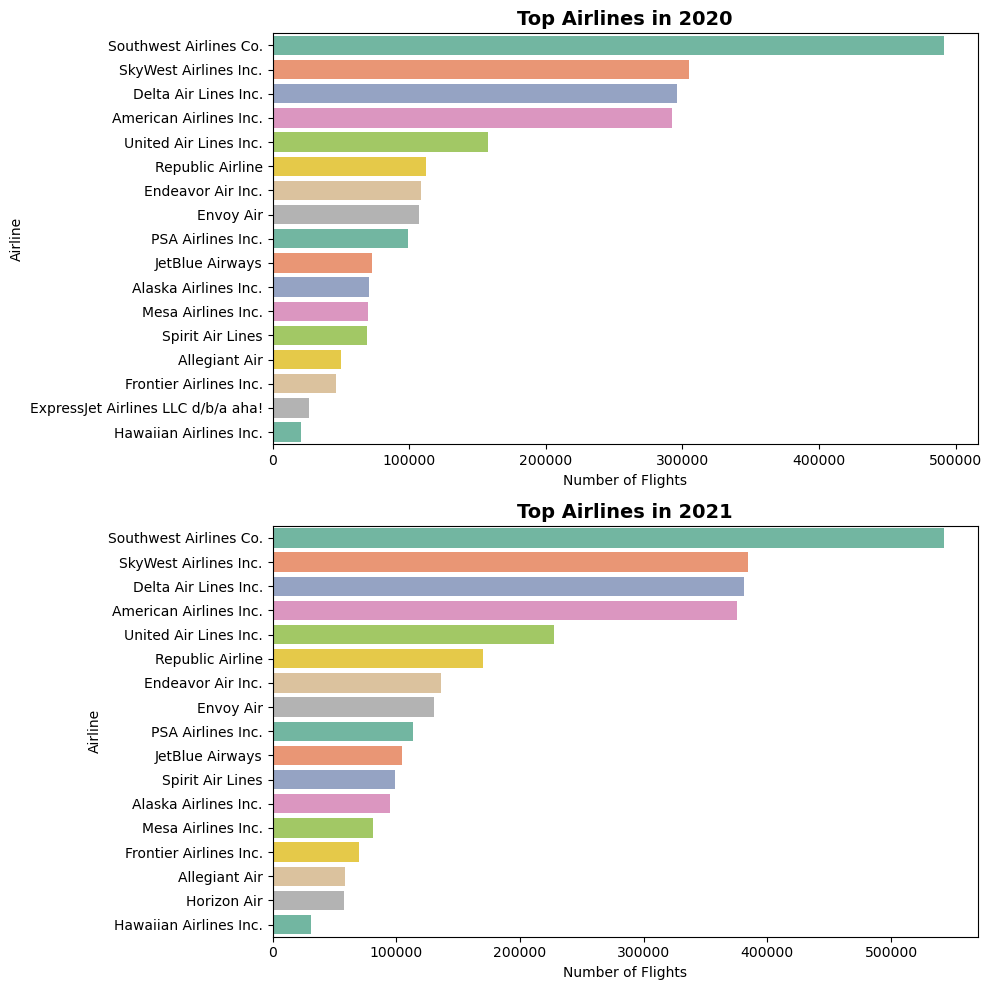

In [30]:
# Top Airlines per Year
top_airlines = (
    df_preprocessed_data.groupby(["Year", "AIRLINE"])
    .size()
    .reset_index(name="Flights")
)

# Sort by flights within each year
top_airlines = top_airlines.sort_values(["Year", "Flights"], ascending=[True, False])

years = sorted(top_airlines["Year"].unique())
fig, axes = plt.subplots(len(years), 1, figsize=(10, 5 * len(years)))

for i, year in enumerate(years):
    subset = top_airlines[top_airlines["Year"] == year]
    sns.barplot(
        data=subset,
        x="Flights",
        y="AIRLINE",
        hue="AIRLINE",   
        dodge=False,
        palette="Set2",
        legend=False,
        ax=axes[i]
    )
    axes[i].set_title(f"Top Airlines in {year}", fontsize=14, weight="bold")
    axes[i].set_xlabel("Number of Flights")
    axes[i].set_ylabel("Airline")

plt.tight_layout()
plt.show()

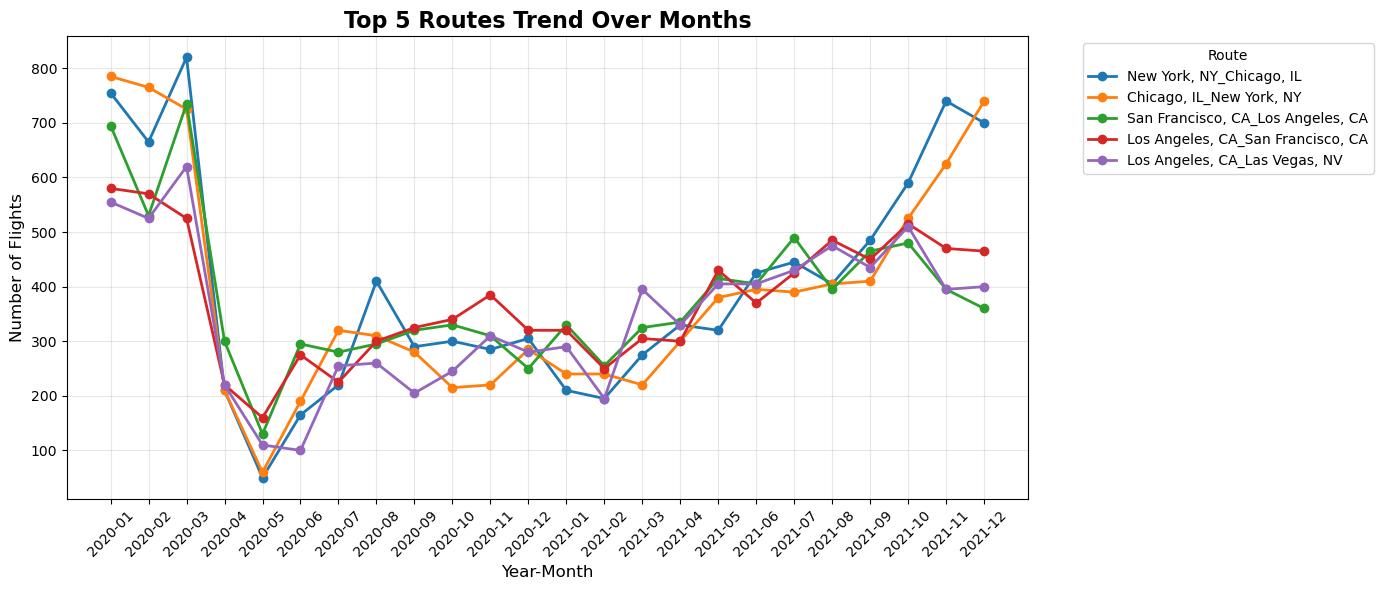

In [31]:
# Top 5 Routes Trend

# Count flights per route per Year-Month
top_routes_monthly = (
    df_preprocessed_data.groupby(["Year", "Month", "Route"])
    .size()
    .reset_index(name="Flights")
)

# Pick top 5 busiest routes overall
top5_routes = (
    top_routes_monthly.groupby("Route")["Flights"].sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

# Create sorted Year-Month labels
top_routes_monthly["YearMonth"] = top_routes_monthly["Year"].astype(str) + "-" + top_routes_monthly["Month"].astype(str).str.zfill(2)
all_yearmonths = sorted(top_routes_monthly["YearMonth"].unique())

# Plot
plt.figure(figsize=(14, 6))
for route in top5_routes:
    subset = top_routes_monthly[top_routes_monthly["Route"] == route].set_index("YearMonth")
    subset = subset.reindex(all_yearmonths, fill_value=0).reset_index()
    plt.plot(subset["YearMonth"], subset["Flights"], marker="o", linewidth=2, label=route)

# Styling
plt.title("Top 5 Routes Trend Over Months", fontsize=16, weight="bold")
plt.xlabel("Year-Month", fontsize=12)
plt.ylabel("Number of Flights", fontsize=12)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.legend(title="Route", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


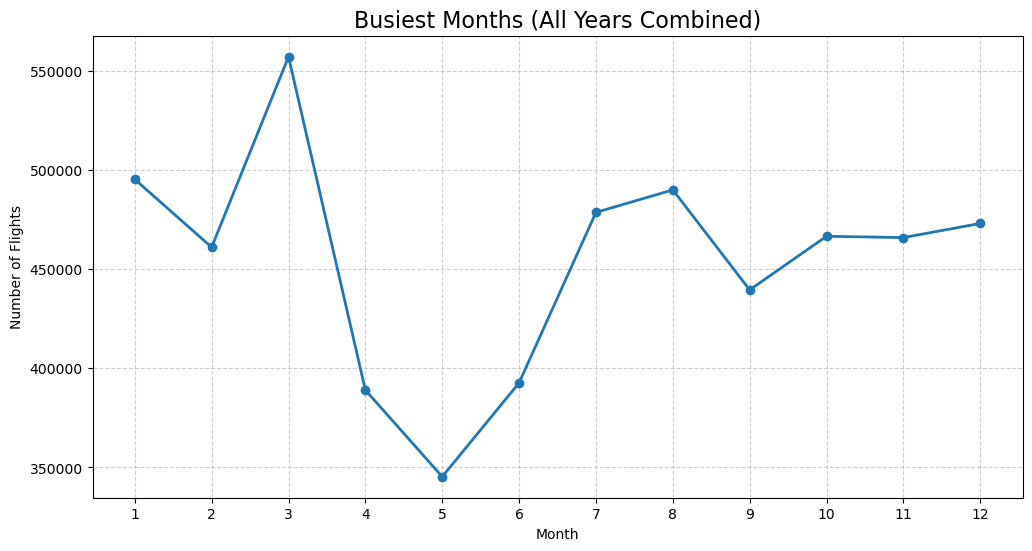

In [32]:
# Busiest Months

# Group by Month (across all years)
monthly_flights = df_preprocessed_data.groupby("Month").size().reset_index(name="Flights")

# Plot
plt.figure(figsize=(12,6))
plt.plot(monthly_flights["Month"], monthly_flights["Flights"], marker="o", linewidth=2)
plt.title("Busiest Months (All Years Combined)", fontsize=16)
plt.xlabel("Month")
plt.ylabel("Number of Flights")
plt.xticks(range(1,13))
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


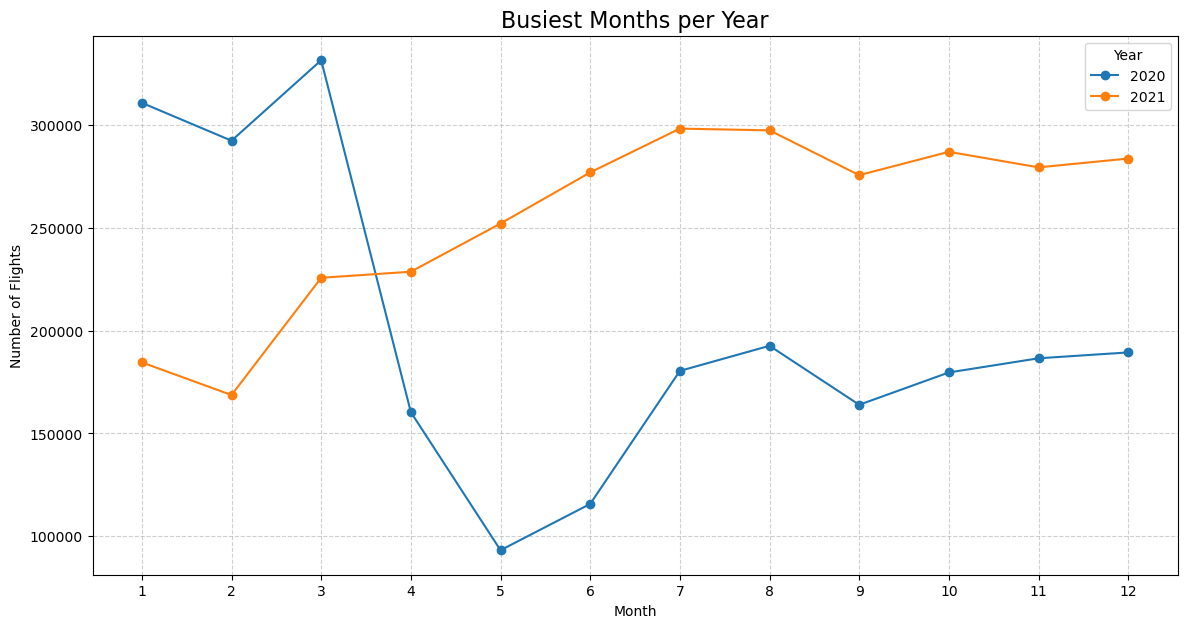

In [33]:
# Group by Year + Month
monthly_flights_year = (
    df_preprocessed_data.groupby(["Year", "Month"])
    .size()
    .reset_index(name="Flights")
)

# Plot
plt.figure(figsize=(14,7))
for year in sorted(monthly_flights_year["Year"].unique()):
    year_data = monthly_flights_year[monthly_flights_year["Year"] == year]
    plt.plot(year_data["Month"], year_data["Flights"], marker="o", label=year)

plt.title("Busiest Months per Year", fontsize=16)
plt.xlabel("Month")
plt.ylabel("Number of Flights")
plt.xticks(range(1,13))
plt.legend(title="Year")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

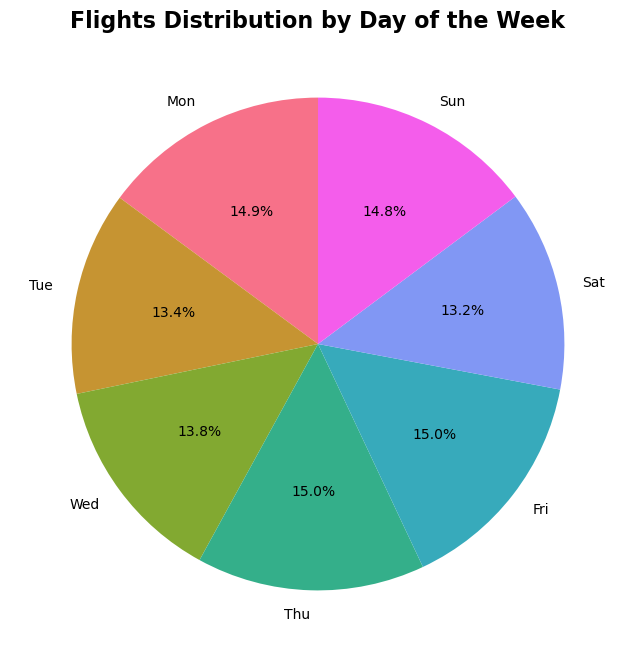

In [34]:
# Group flights by DayOfWeek
day_flights = df_preprocessed_data.groupby("DayOfWeek").size().reset_index(name="Flights")

# Map day numbers to names (0=Monday … 6=Sunday)
day_map = {0:"Mon", 1:"Tue", 2:"Wed", 3:"Thu", 4:"Fri", 5:"Sat", 6:"Sun"}
day_flights["Day"] = day_flights["DayOfWeek"].map(day_map)

# Pie chart
plt.figure(figsize=(8,8))
plt.pie(
    day_flights["Flights"],
    labels=day_flights["Day"],
    autopct="%1.1f%%",
    colors=sns.color_palette("husl", 7),
    startangle=90
)
plt.title("Flights Distribution by Day of the Week", fontsize=16, fontweight="bold")
plt.show()

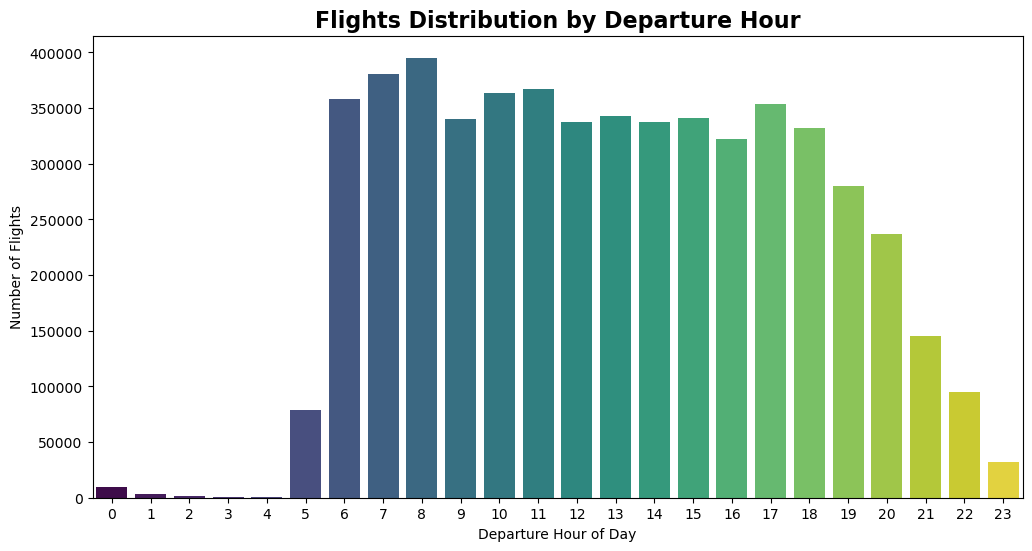

In [35]:
# Count flights per hour
hourly_flights = df_preprocessed_data["DepHour"].value_counts().sort_index()

plt.figure(figsize=(12,6))
sns.barplot(
    x=hourly_flights.index,
    y=hourly_flights.values,
    hue=hourly_flights.index,  
    palette="viridis",
    legend=False               
)
plt.title("Flights Distribution by Departure Hour", fontsize=16, fontweight="bold")
plt.xlabel("Departure Hour of Day")
plt.ylabel("Number of Flights")
plt.show()

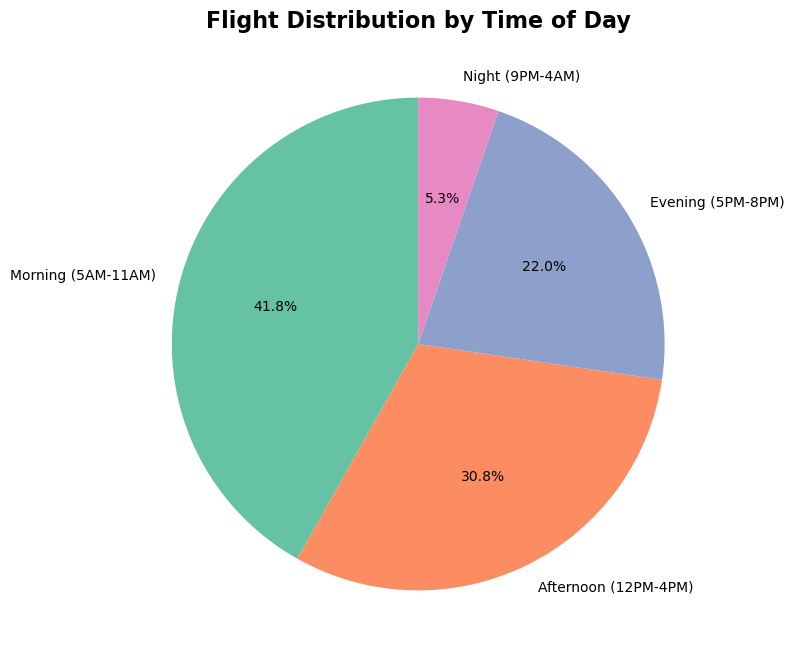

In [36]:
# Categorize into time slots
def time_of_day(hour):
    if 5 <= hour < 12:
        return "Morning (5AM-11AM)"
    elif 12 <= hour < 17:
        return "Afternoon (12PM-4PM)"
    elif 17 <= hour < 21:
        return "Evening (5PM-8PM)"
    else:
        return "Night (9PM-4AM)"

df_preprocessed_data["TimeOfDay"] = df_preprocessed_data["DepHour"].apply(time_of_day)

time_flights = df_preprocessed_data["TimeOfDay"].value_counts().reset_index()
time_flights.columns = ["TimeOfDay", "Flights"]

plt.figure(figsize=(8,8))
plt.pie(
    time_flights["Flights"], 
    labels=time_flights["TimeOfDay"], 
    autopct="%1.1f%%", 
    colors=sns.color_palette("Set2"), 
    startangle=90
)
plt.title("Flight Distribution by Time of Day", fontsize=16, fontweight="bold")
plt.show()

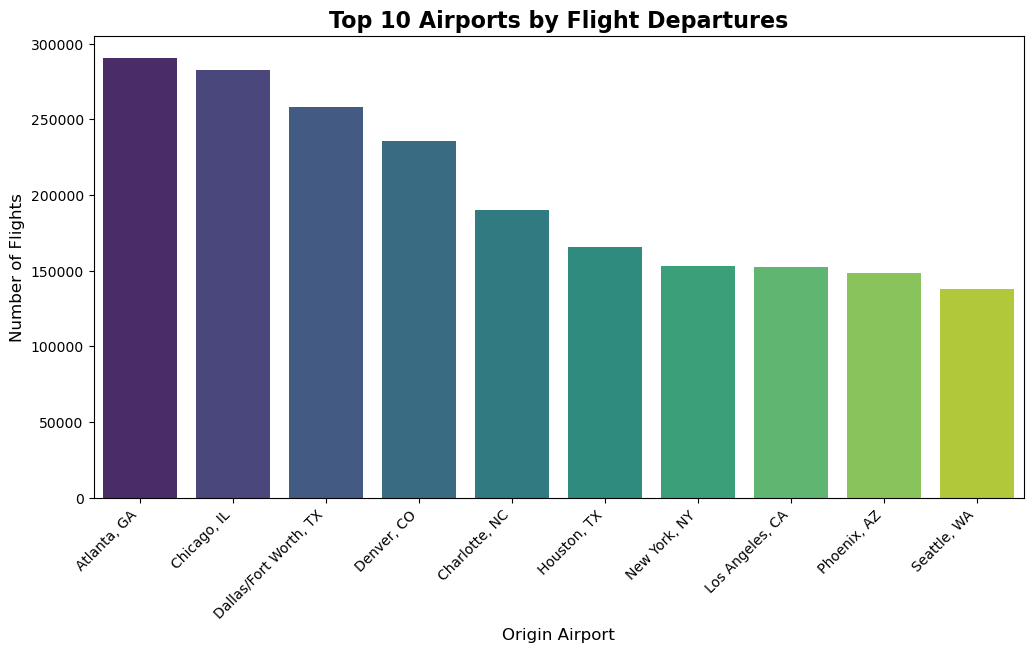

In [37]:
# Top 10 Origin Airports
top_airports = df_preprocessed_data["ORIGIN_CITY"].value_counts().head(10).reset_index()
top_airports.columns = ["Airport", "Flights"]

plt.figure(figsize=(12,6))
sns.barplot(
    data=top_airports, 
    x="Airport", 
    y="Flights", 
    hue="Airport",   
    palette="viridis", 
    legend=False      
)

plt.xticks(rotation=45, ha="right", fontsize=10)
plt.xlabel("Origin Airport", fontsize=12)
plt.ylabel("Number of Flights", fontsize=12)
plt.title("Top 10 Airports by Flight Departures", fontsize=16, fontweight="bold")
plt.show()

#### **Week 4: Delay Analysis – Airline and Weather**

• Compare delay causes by airline <br>
• Explore carrier delays, weather delays, NAS delays <br>
• Visualize delays by time of day and airport

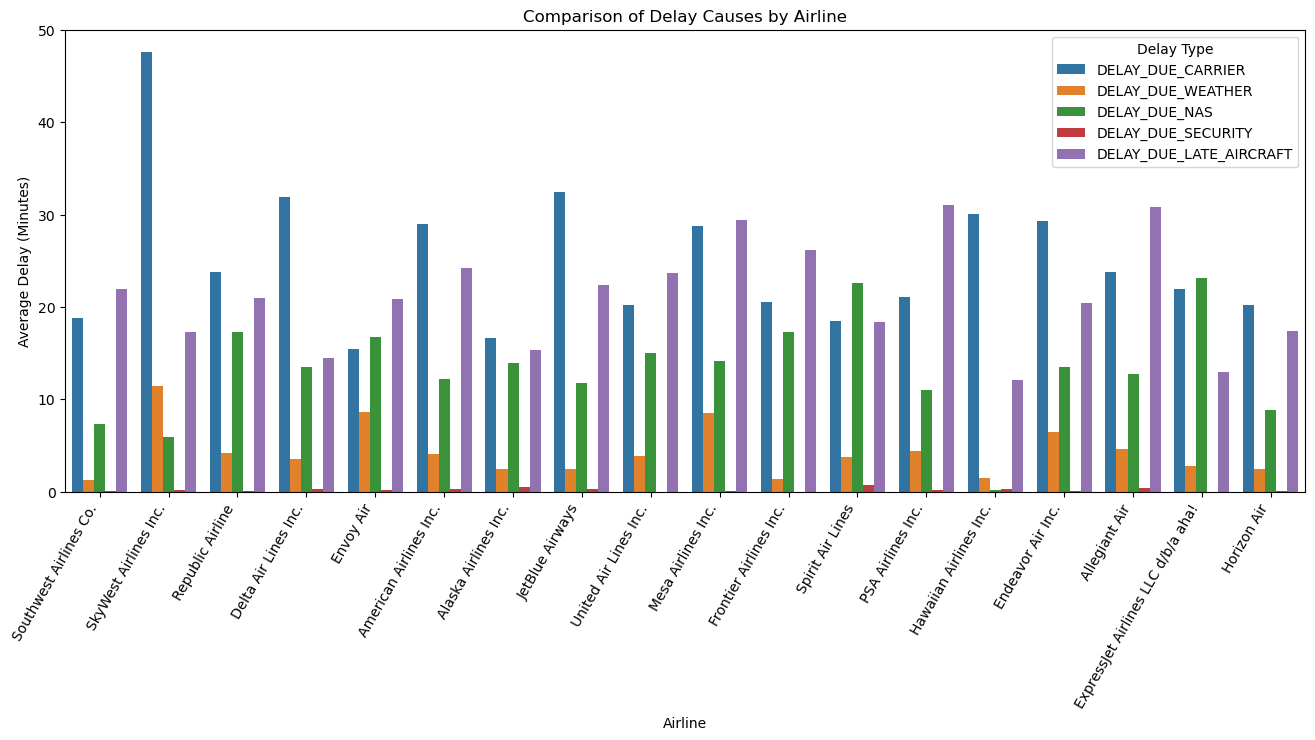

In [38]:
# Average delay minutes per cause by airline
plt.figure(figsize=(16,6))
sns.barplot(
    data=df_preprocessed_data,
    x="AIRLINE",
    y="Delay_Minutes",
    hue="Delay_Type",
    errorbar=None
)
plt.title("Comparison of Delay Causes by Airline")
plt.xlabel("Airline")
plt.ylabel("Average Delay (Minutes)")
plt.legend(title="Delay Type")
plt.xticks(rotation=60, ha="right")  
plt.show()

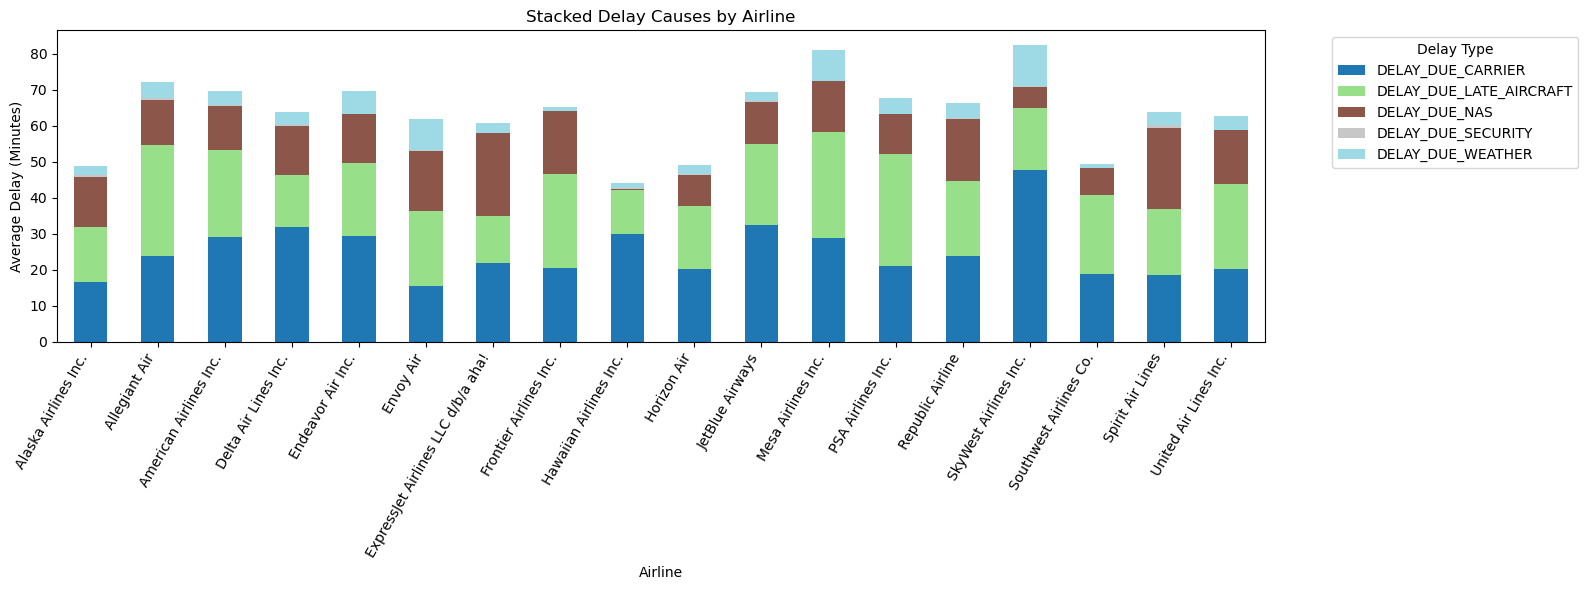

In [39]:
pivot_airline = df_preprocessed_data.pivot_table(
    values="Delay_Minutes", 
    index="AIRLINE", 
    columns="Delay_Type", 
    aggfunc="mean", 
    fill_value=0
)

ax = pivot_airline.plot(
    kind="bar", 
    stacked=True, 
    figsize=(16,6),   # wider for better spacing
    colormap="tab20"
)

plt.title("Stacked Delay Causes by Airline")
plt.xlabel("Airline")
plt.ylabel("Average Delay (Minutes)")
plt.xticks(rotation=60, ha="right")   # rotate & align labels
plt.legend(title="Delay Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()   # adjust layout so labels/legend don’t get cut
plt.show()

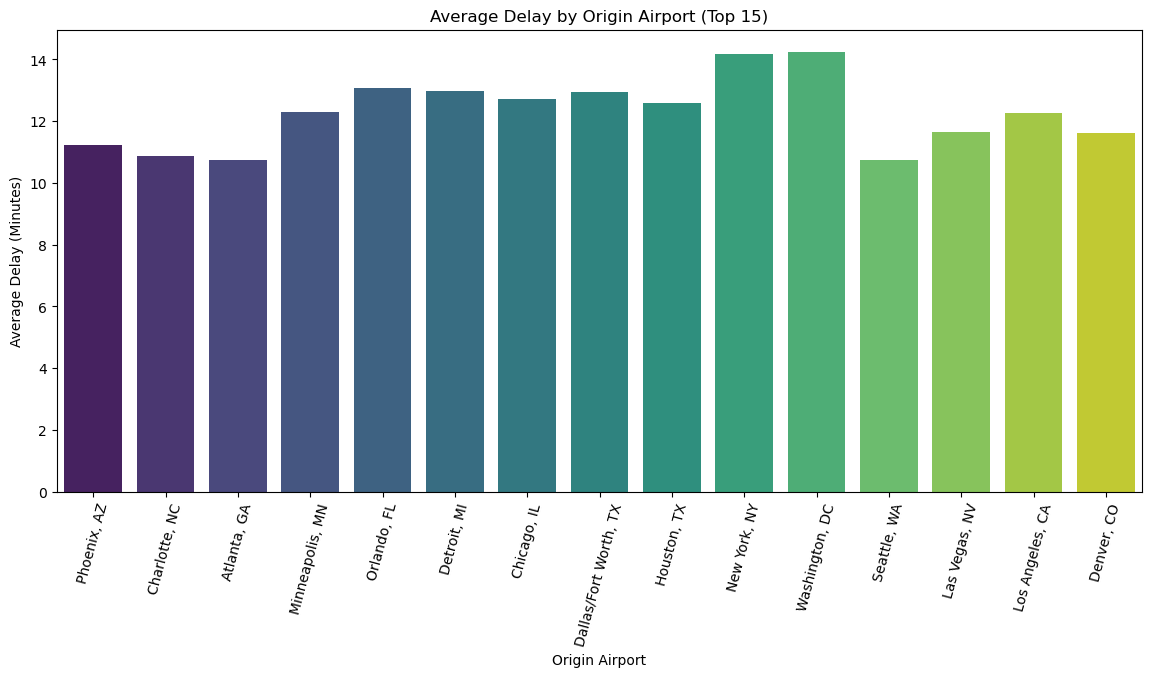

In [40]:
# Top 15 busiest airports
top_airports = df_preprocessed_data['ORIGIN_CITY'].value_counts().head(15).index
df_top_airports = df_preprocessed_data[df_preprocessed_data['ORIGIN_CITY'].isin(top_airports)]

plt.figure(figsize=(14,6))
sns.barplot(
    data=df_top_airports, 
    x="ORIGIN_CITY", 
    y="Delay_Minutes", 
    hue="ORIGIN_CITY",     
    palette="viridis", 
    errorbar=None,         
    legend=False          
)
plt.title("Average Delay by Origin Airport (Top 15)")
plt.xlabel("Origin Airport")
plt.ylabel("Average Delay (Minutes)")
plt.xticks(rotation=75)
plt.show()

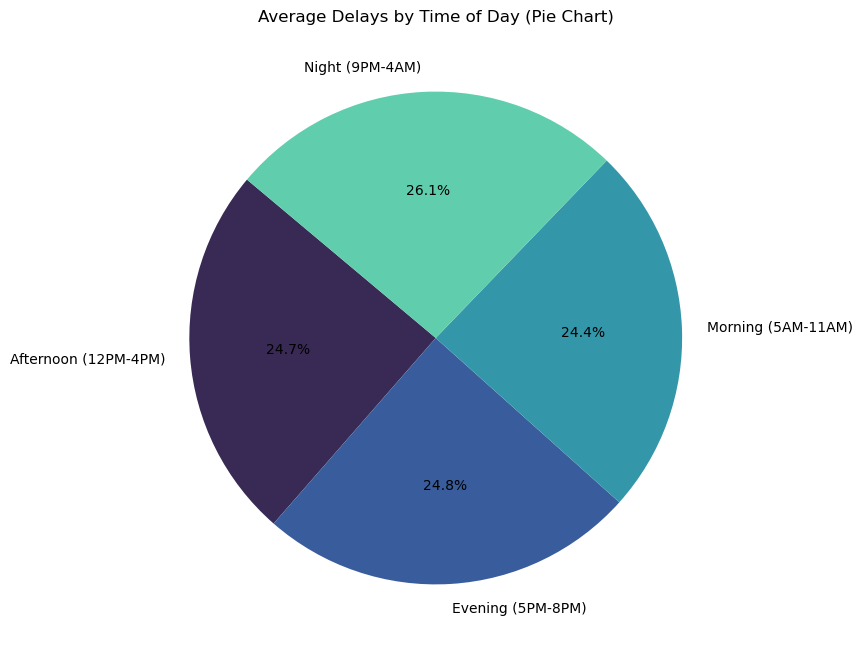

In [41]:
# Compute average delay by time of day
avg_delay = df_preprocessed_data.groupby("TimeOfDay")["Delay_Minutes"].mean()

# Use seaborn "mako" palette
colors = sns.color_palette("mako", n_colors=len(avg_delay))

# Pie chart
plt.figure(figsize=(8,8))
plt.pie(avg_delay, 
        labels=avg_delay.index, 
        autopct="%1.1f%%", 
        startangle=140, 
        colors=colors)

plt.title("Average Delays by Time of Day (Pie Chart)")
plt.show()

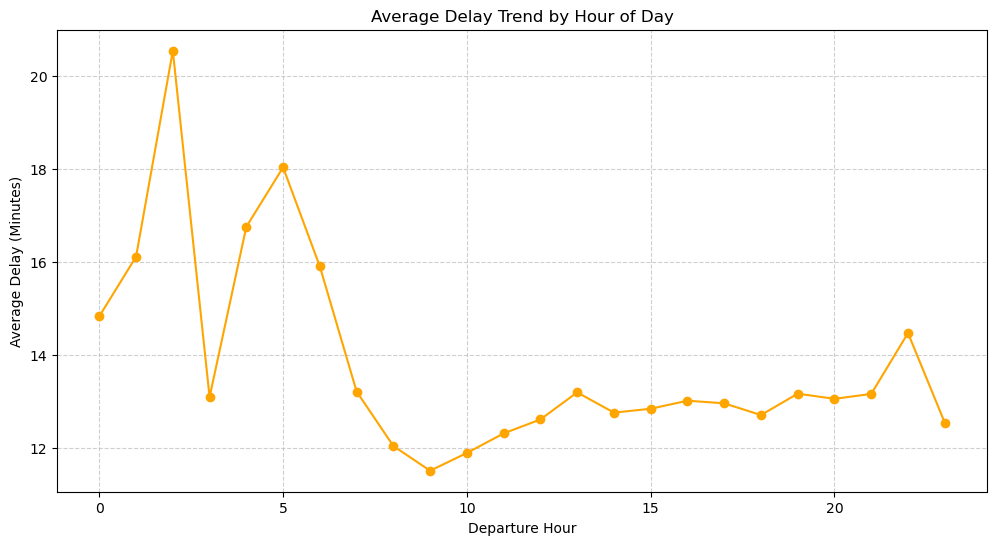

In [42]:
avg_delay_time = df_preprocessed_data.groupby("DepHour")["Delay_Minutes"].mean()

plt.figure(figsize=(12,6))
plt.plot(avg_delay_time.index, avg_delay_time.values, marker="o", linestyle="-", color="orange")
plt.title("Average Delay Trend by Hour of Day")
plt.xlabel("Departure Hour")
plt.ylabel("Average Delay (Minutes)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

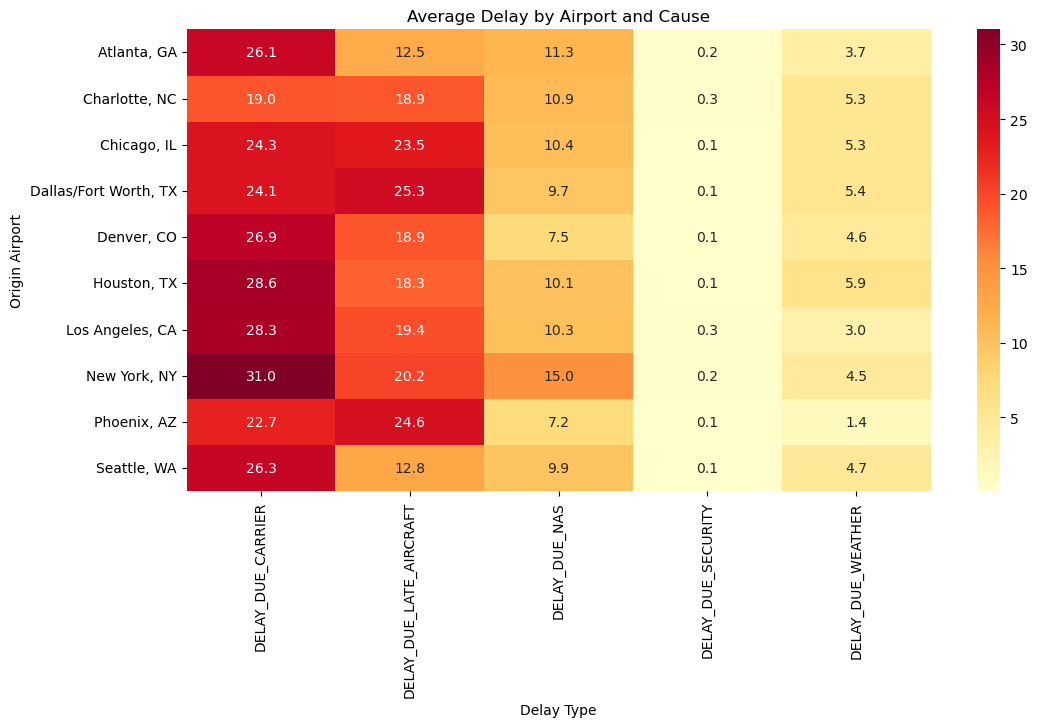

In [43]:
top_airports = df_preprocessed_data['ORIGIN_CITY'].value_counts().head(10).index
df_top = df_preprocessed_data[df_preprocessed_data['ORIGIN_CITY'].isin(top_airports)]

heatmap_data = df_top.pivot_table(values="Delay_Minutes", 
                                  index="ORIGIN_CITY", 
                                  columns="Delay_Type", 
                                  aggfunc="mean", fill_value=0)

plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlOrRd")
plt.title("Average Delay by Airport and Cause")
plt.xlabel("Delay Type")
plt.ylabel("Origin Airport")
plt.show()

**Done**

## **Milestone 3: Route, Cancellation, and Seasonal Insights**

#### **Week 5: Route and Airport-Level Analysis**

• Top 10 origin-destination pairs <br>
• Delay heatmaps by airport and route <br>
• Maps showing busiest airports and average delays 

In [44]:
top_routes = (
    df_preprocessed_data.groupby(["ORIGIN_CITY", "DEST_CITY"])
    .size()
    .reset_index(name="Count")
    .sort_values(by="Count", ascending=False)
    .head(10)
)

print(top_routes)

            ORIGIN_CITY          DEST_CITY  Count
4060       New York, NY        Chicago, IL   9595
1166        Chicago, IL       New York, NY   9235
5501  San Francisco, CA    Los Angeles, CA   9120
3368    Los Angeles, CA  San Francisco, CA   9010
3328    Los Angeles, CA      Las Vegas, NV   8350
1057        Chicago, IL        Atlanta, GA   8260
217         Atlanta, GA        Chicago, IL   8065
293         Atlanta, GA       New York, NY   7875
3128      Las Vegas, NV    Los Angeles, CA   7860
4044       New York, NY        Atlanta, GA   7765


In [45]:
import plotly.graph_objects as go

# Coordinates dictionary
city_coords = {
    "New York, NY": (40.7128, -74.0060),
    "Chicago, IL": (41.8781, -87.6298),
    "San Francisco, CA": (37.7749, -122.4194),
    "Los Angeles, CA": (34.0522, -118.2437),
    "Las Vegas, NV": (36.1699, -115.1398),
    "Atlanta, GA": (33.7490, -84.3880)
}

# Create the map
fig = go.Figure()

# Add lines for each route
for _, row in top_routes.iterrows():
    city_a = row['ORIGIN_CITY']
    city_b = row['DEST_CITY']
    count = row['Count']
    
    if city_a not in city_coords or city_b not in city_coords:
        continue

    lat_a, lon_a = city_coords[city_a]
    lat_b, lon_b = city_coords[city_b]

    fig.add_trace(go.Scattergeo(
        locationmode='USA-states',
        lon=[lon_a, lon_b],
        lat=[lat_a, lat_b],
        mode='lines',
        line=dict(width=2, color='mediumblue'),  # medium blue line
        opacity=0.7,
        hoverinfo='text',
        text=f"{city_a} ↔ {city_b}<br>Count: {count}"
    ))

# Add city markers
for city, (lat, lon) in city_coords.items():
    fig.add_trace(go.Scattergeo(
        locationmode='USA-states',
        lon=[lon],
        lat=[lat],
        mode='markers+text',
        text=[city],
        textposition='top center',
        marker=dict(size=6, color='red'),
        showlegend=False
    ))

# Layout settings
fig.update_layout(
    title_text='Top 10 Flight Routes Between Cities',
    showlegend=False,
    geo=dict(
        scope='usa',
        projection_type='albers usa',
        showland=True,
        landcolor="rgb(220, 220, 220)",   # lighter grey background
        lakecolor="rgb(180, 210, 255)",   # optional lake color for contrast
        bgcolor="rgb(245, 245, 245)",     # overall background
    ),
    height=800
)

fig.show()

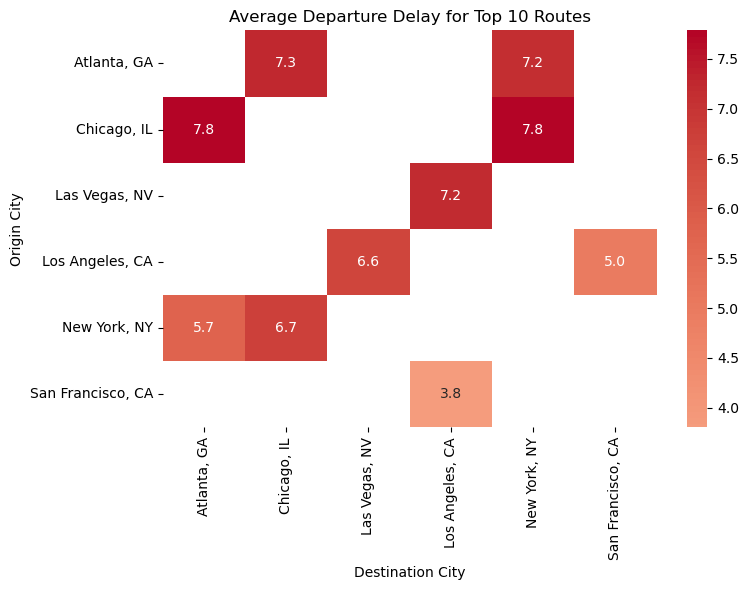

In [46]:
# Filter the dataset for these top routes
top_route_delays = df_preprocessed_data.merge(
    top_routes[["ORIGIN_CITY", "DEST_CITY"]],
    on=["ORIGIN_CITY", "DEST_CITY"],
    how="inner"
)

# Calculate average departure delay per top route
avg_delay = (
    top_route_delays.groupby(["ORIGIN_CITY", "DEST_CITY"])["DEP_DELAY"]
    .mean()
    .reset_index()
)

# Pivot for heatmap format
delay_matrix = avg_delay.pivot(index="ORIGIN_CITY", columns="DEST_CITY", values="DEP_DELAY")

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(delay_matrix, annot=True, fmt=".1f", cmap="coolwarm", center=0)
plt.title("Average Departure Delay for Top 10 Routes")
plt.xlabel("Destination City")
plt.ylabel("Origin City")
plt.tight_layout()
plt.show()


In [47]:
# Get flights and delays by ORIGIN_CITY
airport_stats = df_preprocessed_data.groupby("ORIGIN_CITY").agg(
    flights_count=("ORIGIN_CITY", "count"),
    avg_delay=("DEP_DELAY", "mean")
).reset_index()

# Map coordinates to DataFrame
airport_stats["lat"] = airport_stats["ORIGIN_CITY"].map(lambda x: city_coords.get(x, (None, None))[0])
airport_stats["lon"] = airport_stats["ORIGIN_CITY"].map(lambda x: city_coords.get(x, (None, None))[1])

# Normalize bubble size
min_size, max_size = 10, 50
flights = airport_stats["flights_count"]
size_scaled = min_size + (flights - flights.min()) / (flights.max() - flights.min()) * (max_size - min_size)

# Plot with Plotly
fig = go.Figure()

fig.add_trace(go.Scattergeo(
    locationmode='USA-states',
    lon=airport_stats["lon"],
    lat=airport_stats["lat"],
    text=airport_stats["ORIGIN_CITY"],  # labels on map
    hovertext=[
        f"{city}<br>Avg Delay: {delay:.1f} min<br>Flights: {count}" 
        for city, delay, count in zip(airport_stats["ORIGIN_CITY"], airport_stats["avg_delay"], airport_stats["flights_count"])
    ],
    hoverinfo='text',
    mode='markers+text',
    marker=dict(
        size=size_scaled,
        color='red',
        line=dict(width=1, color='darkred'),
        opacity=0.8
    ),
    textposition="top center",
    showlegend=False
))


fig.update_layout(
    title_text='Airports Sized by Number of Flights & Avg Departure Delay',
    geo=dict(
        scope='usa',
        projection_type='albers usa',
        showland=True,
        landcolor="rgb(220, 220, 220)",   # lighter grey background
        lakecolor="rgb(180, 210, 255)",   # optional lake color for contrast
        bgcolor="rgb(245, 245, 245)",     # overall background
    ),
    paper_bgcolor="rgb(245, 245, 245)",   # match overall background
    plot_bgcolor="rgb(245, 245, 245)",    # match overall background
    height=600
)


fig.show()

#### **Week 6: Seasonal and Cancellation Analysis**

• Monthly cancellation trends <br>
• Cancellation types: carrier, weather, security, NAS <br>
• Analyze impact of holidays or winter months 

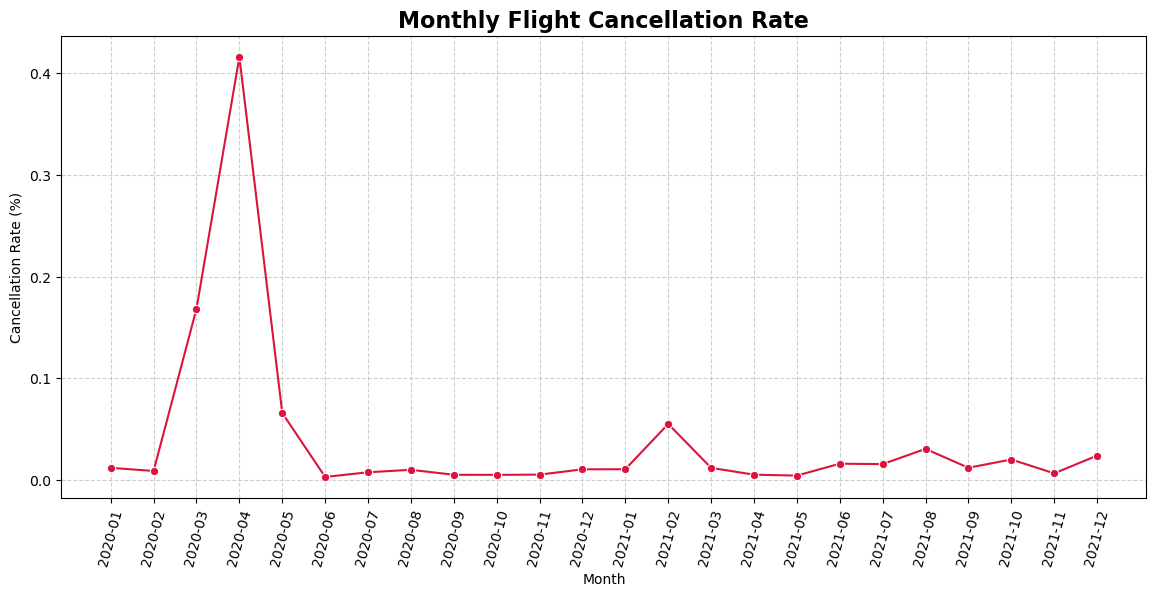

In [48]:
# Group by Year-Month and calculate cancellation rate
monthly_cancellations = (
    df_preprocessed_data.groupby(["Year", "Month"])["CANCELLED"]
    .mean()
    .reset_index()
)

# Combine Year and Month into a single column for plotting
monthly_cancellations["YearMonth"] = (
    monthly_cancellations["Year"].astype(str) + "-" + monthly_cancellations["Month"].astype(str).str.zfill(2)
)

plt.figure(figsize=(14,6))
sns.lineplot(
    data=monthly_cancellations,
    x="YearMonth",
    y="CANCELLED",
    marker="o",
    color="crimson"
)

plt.title("Monthly Flight Cancellation Rate", fontsize=16, fontweight="bold")
plt.xlabel("Month")
plt.ylabel("Cancellation Rate (%)")
plt.xticks(rotation=75)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


In [49]:
import plotly.express as px

# Create YearMonth column
df_preprocessed_data["YearMonth"] = df_preprocessed_data["FL_DATE"].dt.to_period("M").astype(str)

# Group by YearMonth & Airline, count cancellations
monthly_cancel_counts = (
    df_preprocessed_data.groupby(["YearMonth", "AIRLINE"])["CANCELLED"]
      .sum()  # since True=1, False=0
      .reset_index()
)

# Plot
fig = px.line(
    monthly_cancel_counts,
    x="YearMonth",
    y="CANCELLED",
    color="AIRLINE",
    markers=True,
    hover_name="AIRLINE",
    hover_data={"YearMonth": True, "CANCELLED": True}
)

fig.update_layout(
    title="Monthly Cancelled Flights by Airline",
    xaxis_title="Month",
    yaxis_title="Number of Cancelled Flights",
    legend_title="Airline",
    template="plotly_white",
    width=1200,
    height=700
)

fig.update_xaxes(tickangle=75)
fig.show()


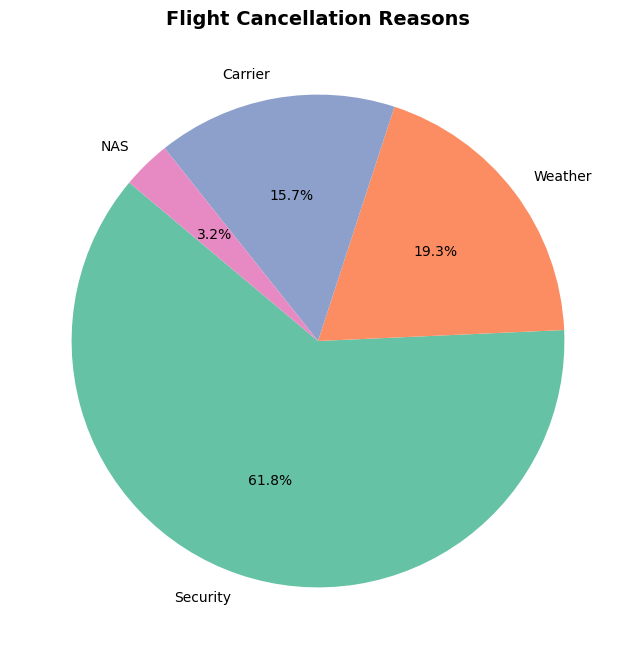

In [50]:
# Map codes to reasons (fixed comma issue)
cancel_map = {
    "A": "Carrier",
    "B": "Weather",
    "C": "NAS",
    "D": "Security",
}

# Map cancellation reason
df_preprocessed_data["Cancellation_Reason"] = df_preprocessed_data["CANCELLATION_CODE"].map(cancel_map)

# Count cancellation reasons only for cancelled flights
cancel_counts = (
    df_preprocessed_data[df_preprocessed_data["CANCELLED"] == True]
    ["Cancellation_Reason"]
    .value_counts()
    .reset_index()
)
cancel_counts.columns = ["Reason", "Count"]

plt.figure(figsize=(8, 8))
colors = sns.color_palette("Set2", n_colors=len(cancel_counts))
plt.pie(
    cancel_counts["Count"],
    labels=cancel_counts["Reason"],
    autopct="%1.1f%%",
    startangle=140,
    colors=colors
)
plt.title("Flight Cancellation Reasons", fontsize=14, fontweight="bold")
plt.show()

In [51]:
# Define US holidays (static list by month/day)
us_holidays = [
    (1, 1),    # New Year's Day
    (1, 20),   # Example MLK (3rd Monday of Jan 2020)
    (2, 17),   # Example Presidents' Day (3rd Monday Feb 2020)
    (5, 25),   # Memorial Day 2020 (last Monday May)
    (6, 19),   # Juneteenth
    (7, 4),    # Independence Day
    (9, 7),    # Labor Day 2020 (1st Monday Sept)
    (10, 12),  # Columbus Day 2020
    (11, 11),  # Veterans Day
    (11, 26),  # Thanksgiving 2020 (4th Thursday Nov)
    (12, 25)   # Christmas Day
]

# Create Is_Holiday flag
df_preprocessed_data["Is_Holiday"] = df_preprocessed_data["FL_DATE"].dt.month.astype(int).astype(str) + "-" + df_preprocessed_data["FL_DATE"].dt.day.astype(int).astype(str)
df_preprocessed_data["Is_Holiday"] = df_preprocessed_data["FL_DATE"].apply(
    lambda x: (x.month, x.day) in us_holidays
)

# Compare cancellation rate
holiday_cancel = df_preprocessed_data.groupby("Is_Holiday")["CANCELLED"].mean().reset_index()
holiday_cancel["CANCELLED"] = holiday_cancel["CANCELLED"].round(4)

print("Holiday vs Non-Holiday Cancellation Rate:")
print(holiday_cancel)


Holiday vs Non-Holiday Cancellation Rate:
   Is_Holiday  CANCELLED
0       False     0.0365
1        True     0.0199


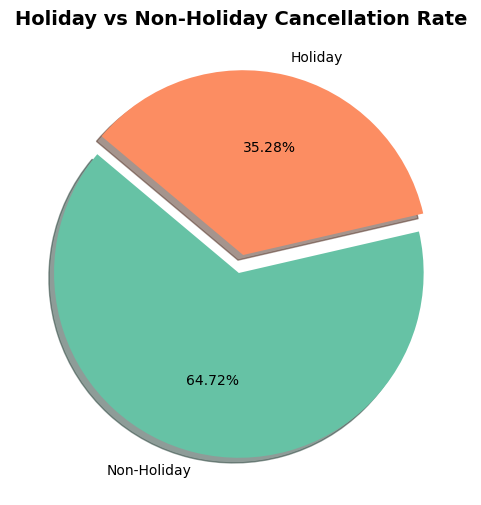

In [52]:
# Convert cancellation rate to percentage for display
labels = ["Non-Holiday", "Holiday"]
sizes = holiday_cancel["CANCELLED"].values * 100   # to percentage
colors = ["#66c2a5", "#fc8d62"]

plt.figure(figsize=(6,6))
plt.pie(
    sizes,
    labels=labels,
    autopct="%.2f%%",
    startangle=140,
    colors=colors,
    explode=(0.05, 0.05),   # slight separation for clarity
    shadow=True
)

plt.title("Holiday vs Non-Holiday Cancellation Rate", fontsize=14, fontweight="bold")
plt.show()


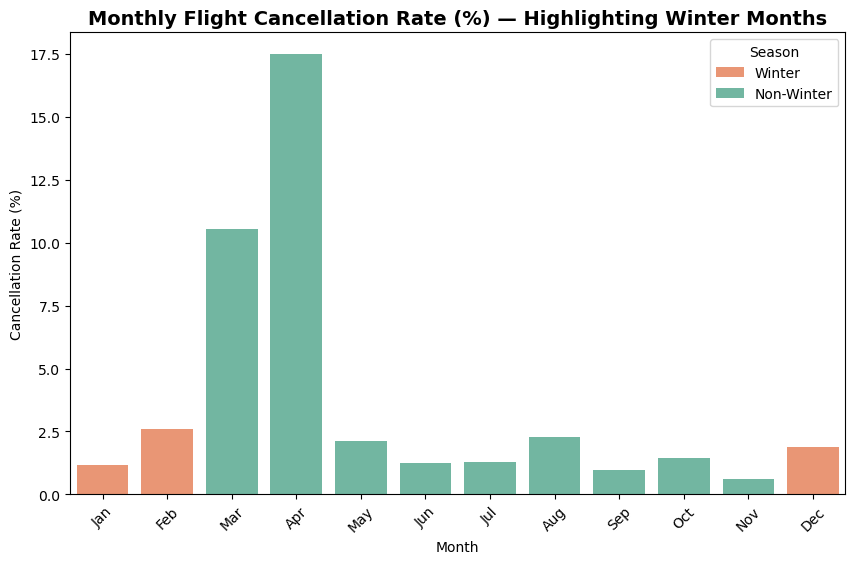

In [53]:
# Group by Month and calculate average cancellation rate
monthly_cancel = df_preprocessed_data.groupby("Month")["CANCELLED"].mean().reset_index()

# Convert to percentage
monthly_cancel["CANCELLED"] = monthly_cancel["CANCELLED"] * 100

# Define winter months
winter_months = [12, 1, 2]

# Add color coding
monthly_cancel["Season"] = monthly_cancel["Month"].apply(lambda x: "Winter" if x in winter_months else "Non-Winter")

plt.figure(figsize=(10,6))
sns.barplot(
    data=monthly_cancel,
    x="Month",
    y="CANCELLED",
    hue="Season",
    dodge=False,   # overlap to highlight winter
    palette={"Winter": "#fc8d62", "Non-Winter": "#66c2a5"}
)

plt.title("Monthly Flight Cancellation Rate (%) — Highlighting Winter Months", fontsize=14, fontweight="bold")
plt.xlabel("Month")
plt.ylabel("Cancellation Rate (%)")
plt.xticks(range(0,12), 
           ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"], 
           rotation=45)

plt.legend(title="Season")
plt.show()

**Done**

## milestone 2

In [ ]:
fdg